<a href="https://colab.research.google.com/github/hjmcphail76/Lidar-FRC-AI-Robot-Detection/blob/main/YOLOv8_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!unzip -q /content/Lidar_Detection_Test_1.v1-roboflow-instant-1--eval-.yolov8.zip -d lidar-data

In [8]:
# YOLOv8 Training Notebook for LiDAR Dataset on Colab (Python 3.12 compatible)
# Fully offline training with local weights

# 1️⃣ Install Ultralytics (latest, supports YOLOv8)
!pip install --upgrade ultralytics

# 2️⃣ Imports
from ultralytics import YOLO
import os

# 3️⃣ Paths (update to your local dataset folder)
data_dir = 'lidar-data'  # root folder after unzipping Roboflow export

In [14]:

# 4️⃣ Create data.yaml for YOLOv8
yaml_path = os.path.join(data_dir, 'data.yaml')
with open(yaml_path, 'w') as f:
    f.write(f"""
path: {data_dir}
train: train
val: valid
test: test
names:
  0: box
""")

# 5️⃣ Initialize YOLOv8 model (pretrained backbone)
model = YOLO('yolov8n.pt')  # 'n' for nano, 's' for small, 'm' for medium, 'l' for large

# 6️⃣ Train locally
model.train(
    data=yaml_path,
    epochs=100,
    imgsz=640,
    batch=4,        # adjust depending on GPU/CPU memory
    device='0',     # 'cpu' for CPU, '0' for GPU 0 in Colab
    project='runs/train',
    name='yolov8_lidar',
    augment = True,
)



Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=lidar-data/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_lidar2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d736c45a4e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /content/output_image_pil3.png: 480x640 1 box, 11.0ms
Speed: 2.8ms preprocess, 11.0ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


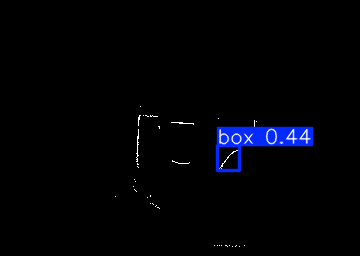

In [15]:
# 7️⃣ After training, local weights will be in:
# runs/train/yolov8_lidar/weights/best.pt

# 8️⃣ Local inference example
results = model.predict(source='output_image_pil3.png')  # replace with your test image
results[0].show()  # visualize predictions

# # Optional: save predictions
# results.save(save_dir='runs/predict')

In [16]:
from google.colab import files

files.download('/content/runs/train/yolov8_lidar/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>